## Dual Moving Average Crossover

The Dual Moving Average (DMA) is a classic momentum strategy. It’s probably not used by any serious trader anymore but is still very instructive. The basic idea is that we compute two rolling or moving averages (mavg) – one with a longer window that is supposed to capture long-term trends and one shorter window that is supposed to capture short-term trends. Once the short-mavg crosses the long-mavg from below we assume that the stock price has upwards momentum and long the stock. If the short-mavg crosses from above we exit the positions as we assume the stock to go down further.

As we need to have access to previous prices to implement this strategy we need a new concept: History. **data.history()** is a convenience function that keeps a rolling window of data for you. The first argument is the number of bars you want to collect, the second argument is the unit (either **'1d'** for daily or **'1m'** for minute frequency, but note that you need to have minute-level data when using 1m). This is a function we use in the **handle_data()** section.



$\color{red}{\text{Ingest the data by running the following command:}}$

In [ ]:
! catalyst ingest-exchange -x bitfinex -f minute -i ltc_usd

In [2]:
# Register the catalyst magic
%load_ext catalyst

In [3]:
# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline

In the following example we will store our output in the more appropriate file with pickle extension

Running in backtesting mode.


[2019-01-25 15:03:13.911591] INFO: run_algo: Catalyst version 0+unknown
[2019-01-25 15:03:13.914034] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-01-25 15:03:16.918241] INFO: run_algo: running algo in backtest mode
[2019-01-25 15:03:17.880067] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2019-01-25 15:03:55.070640] INFO: Performance: Simulated 2 trading days out of 2.
[2019-01-25 15:03:55.074377] INFO: Performance: first open: 2017-09-22 00:00:00+00:00
[2019-01-25 15:03:55.077657] INFO: Performance: last close: 2017-09-23 23:59:00+00:00


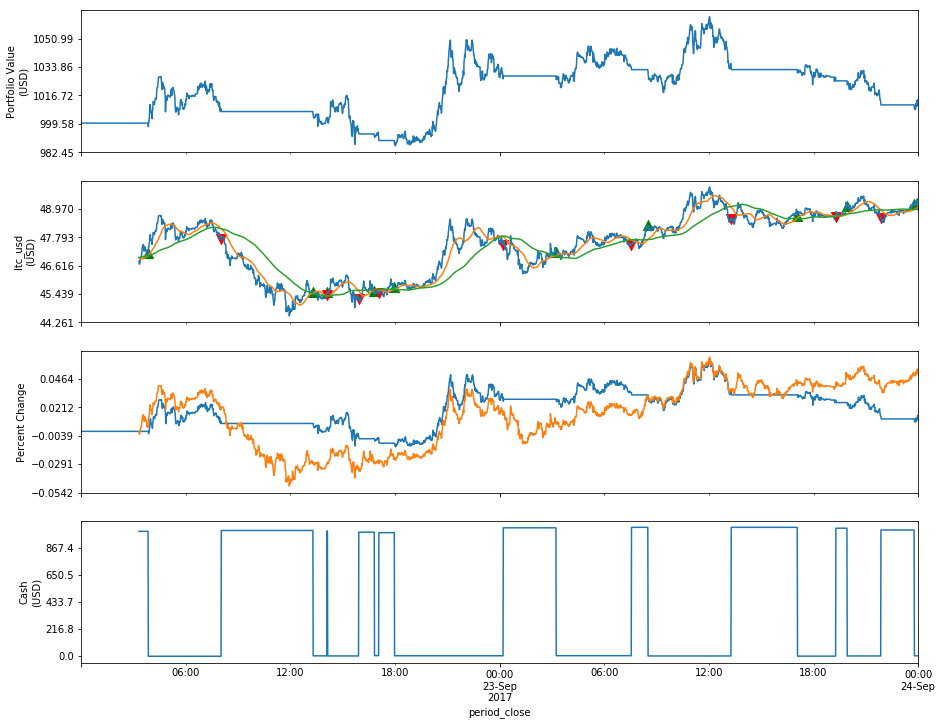

algo_volatility  algorithm_period_return  \
period_close                                                          
2017-09-22 00:01:00+00:00              NaN                      NaN   
2017-09-22 00:02:00+00:00         0.000000                 0.000000   
2017-09-22 00:03:00+00:00         0.000000                 0.000000   
2017-09-22 00:04:00+00:00         0.000000                 0.000000   
2017-09-22 00:05:00+00:00         0.000000                 0.000000   
2017-09-22 00:06:00+00:00         0.000000                 0.000000   
2017-09-22 00:07:00+00:00         0.000000                 0.000000   
2017-09-22 00:08:00+00:00         0.000000                 0.000000   
2017-09-22 00:09:00+00:00         0.000000                 0.000000   
2017-09-22 00:10:00+00:00         0.000000                 0.000000   
2017-09-22 00:11:00+00:00         0.000000                 0.000000   
2017-09-22 00:12:00+00:00         0.000000                 0.000000   
2017-09-22 00:13:00+00:00         0.000000                 0.000000   
2017-09-22 00:14:00+00:00         0.000000                 0.000000   
2017-09-22 00:15:00+00:00         0.000000                 0.000000   
2017-09-22 00:16:00+00:00         0.000000                 0.000000   
2017-09-22 00:17:00+00:00         0.000000                 0.000000   
2017-09-22 00:18:00+00:00         0.000000                 0.000000   
2017-09-22 00:19:00+00:00         0.000000                 0.000000   
2017-09-22 00:20:00+00:00         0.000000                 0.000000   
2017-09-22 00:21:00+00:00         0.000000                 0.000000   
2017-09-22 00:22:00+00:00         0.000000                 0.000000   
2017-09-22 00:23:00+00:00         0.000000                 0.000000   
2017-09-22 00:24:00+00:00         0.000000                 0.000000   
2017-09-22 00:25:00+00:00         0.000000                 0.000000   
2017-09-22 00:26:00+00:00         0.000000                 0.000000   
2017-09-22 00:27:00+00:00         0.000000                 0.000000   
2017-09-22 00:28:00+00:00         0.000000                 0.000000   
2017-09-22 00:29:00+00:00         0.000000                 0.000000   
2017-09-22 00:30:00+00:00         0.000000                 0.000000   
...                                    ...                      ...   
2017-09-23 23:31:00+00:00         0.491710                 0.011022   
2017-09-23 23:32:00+00:00         0.491710                 0.011022   
2017-09-23 23:33:00+00:00         0.491710                 0.011022   
2017-09-23 23:34:00+00:00         0.491710                 0.011022   
2017-09-23 23:35:00+00:00         0.491710                 0.011022   
2017-09-23 23:36:00+00:00         0.491710                 0.011022   
2017-09-23 23:37:00+00:00         0.491710                 0.011022   
2017-09-23 23:38:00+00:00         0.491710                 0.011022   
2017-09-23 23:39:00+00:00         0.491710                 0.011022   
2017-09-23 23:40:00+00:00         0.491710                 0.011022   
2017-09-23 23:41:00+00:00         0.491710                 0.011022   
2017-09-23 23:42:00+00:00         0.491710                 0.011022   
2017-09-23 23:43:00+00:00         0.491710                 0.011022   
2017-09-23 23:44:00+00:00         0.491710                 0.011022   
2017-09-23 23:45:00+00:00         0.491710                 0.011022   
2017-09-23 23:46:00+00:00         0.491710                 0.011022   
2017-09-23 23:47:00+00:00         0.491710                 0.011022   
2017-09-23 23:48:00+00:00         0.514883                 0.008901   
2017-09-23 23:49:00+00:00         0.522518                 0.008202   
2017-09-23 23:50:00+00:00         0.505677                 0.009744   
2017-09-23 23:51:00+00:00         0.503880                 0.009908   
2017-09-23 23:52:00+00:00         0.517353                 0.008675   
2017-09-23 23:53:00+00:00         0.484120                 0.011717   
2017-09-23 23:54:00+00:00         0.500737         

In [4]:
%%catalyst -x bitfinex -s 2017-9-22 -e 2017-9-23 --capital-base 1000 --quote-currency usd --data-frequency minute -o DualMovingAverage.pickle


import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from logbook import Logger

from catalyst import run_algorithm
from catalyst.api import (record, symbol, order_target_percent,)
from catalyst.exchange.utils.stats_utils import extract_transactions

NAMESPACE = 'dual_moving_average'
log = Logger(NAMESPACE)


def initialize(context):
    context.i = 0
    context.asset = symbol('ltc_usd')
    context.base_price = None


def handle_data(context, data):
    # define the windows for the moving averages
    short_window = 50
    long_window = 200

    # Skip as many bars as long_window to properly compute the average
    context.i += 1
    if context.i < long_window:
        return

    # Compute moving averages calling data.history() for each
    # moving average with the appropriate parameters. We choose to use
    # minute bars for this simulation -> freq="1m"
    # Returns a pandas dataframe.
    short_data = data.history(context.asset,
                              'price',
                              bar_count=short_window,
                              frequency="1T",
                              )
    short_mavg = short_data.mean()
    long_data = data.history(context.asset,
                             'price',
                             bar_count=long_window,
                             frequency="1T",
                             )
    long_mavg = long_data.mean()

    # Let's keep the price of our asset in a more handy variable
    price = data.current(context.asset, 'price')

    # If base_price is not set, we use the current value. This is the
    # price at the first bar which we reference to calculate price_change.
    if context.base_price is None:
        context.base_price = price
    price_change = (price - context.base_price) / context.base_price

    # Save values for later inspection
    record(price=price,
           cash=context.portfolio.cash,
           price_change=price_change,
           short_mavg=short_mavg,
           long_mavg=long_mavg)

    # Since we are using limit orders, some orders may not execute immediately
    # we wait until all orders are executed before considering more trades.
    orders = context.blotter.open_orders
    if len(orders) > 0:
        return

    # Exit if we cannot trade
    if not data.can_trade(context.asset):
        return

    # We check what's our position on our portfolio and trade accordingly
    pos_amount = context.portfolio.positions[context.asset].amount

    # Trading logic
    if short_mavg > long_mavg and pos_amount == 0:
        # we buy 100% of our portfolio for this asset
        order_target_percent(context.asset, 1)
    elif short_mavg < long_mavg and pos_amount > 0:
        # we sell all our positions for this asset
        order_target_percent(context.asset, 0)


def analyze(context, perf):
    # Get the quote_currency that was passed as a parameter to the simulation
    exchange = list(context.exchanges.values())[0]
    quote_currency = exchange.quote_currency.upper()
    plt.figure(figsize=(15, 12))

    # First chart: Plot portfolio value using quote_currency
    ax1 = plt.subplot(411)
    perf.loc[:, ['portfolio_value']].plot(ax=ax1)
    ax1.legend_.remove()
    ax1.set_ylabel('Portfolio Value\n({})'.format(quote_currency))
    start, end = ax1.get_ylim()
    ax1.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    # Second chart: Plot asset price, moving averages and buys/sells
    ax2 = plt.subplot(412, sharex=ax1)
    perf.loc[:, ['price', 'short_mavg', 'long_mavg']].plot(
        ax=ax2,
        label='Price')
    ax2.legend_.remove()
    ax2.set_ylabel('{asset}\n({quote})'.format(
        asset=context.asset.symbol,
        quote=quote_currency
    ))
    start, end = ax2.get_ylim()
    ax2.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    transaction_df = extract_transactions(perf)
    if not transaction_df.empty:
        buy_df = transaction_df[transaction_df['amount'] > 0]
        sell_df = transaction_df[transaction_df['amount'] < 0]
        ax2.scatter(
            buy_df.index.to_pydatetime(),
            perf.loc[buy_df.index, 'price'],
            marker='^',
            s=100,
            c='green',
            label=''
        )
        ax2.scatter(
            sell_df.index.to_pydatetime(),
            perf.loc[sell_df.index, 'price'],
            marker='v',
            s=100,
            c='red',
            label=''
        )

    # Third chart: Compare percentage change between our portfolio
    # and the price of the asset
    ax3 = plt.subplot(413, sharex=ax1)
    perf.loc[:, ['algorithm_period_return', 'price_change']].plot(ax=ax3)
    ax3.legend_.remove()
    ax3.set_ylabel('Percent Change')
    start, end = ax3.get_ylim()
    ax3.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    # Fourth chart: Plot our cash
    ax4 = plt.subplot(414, sharex=ax1)
    perf.cash.plot(ax=ax4)
    ax4.set_ylabel('Cash\n({})'.format(quote_currency))
    start, end = ax4.get_ylim()
    ax4.yaxis.set_ticks(np.arange(0, end, end / 5))

    plt.show()


Let's import data with pickle extension:

In [5]:
import pickle
with open('DualMovingAverage.pickle', 'rb') as file:
    data = pickle.load(file)

In [6]:
data.head()

algo_volatility  algorithm_period_return  alpha  \
period_close                                                                 
2017-09-22 00:01:00+00:00              NaN                      NaN    NaN   
2017-09-22 00:02:00+00:00              0.0                      0.0    0.0   
2017-09-22 00:03:00+00:00              0.0                      0.0    0.0   
2017-09-22 00:04:00+00:00              0.0                      0.0    0.0   
2017-09-22 00:05:00+00:00              0.0                      0.0    0.0   

                           benchmark_period_return  benchmark_volatility  \
period_close                                                               
2017-09-22 00:01:00+00:00                      NaN                   NaN   
2017-09-22 00:02:00+00:00                 0.001000              0.011225   
2017-09-22 00:03:00+00:00                 0.002001              0.022461   
2017-09-22 00:04:00+00:00                 0.003003              0.033709   
2017-09-22 00:05:00+00:00                 0.004006              0.044967   

                           beta  capital_base  capital_used  cash  \
period_close                                                        
2017-09-22 00:01:00+00:00   NaN        1000.0           0.0   NaN   
2017-09-22 00:02:00+00:00   0.0        1000.0           0.0   NaN   
2017-09-22 00:03:00+00:00   0.0        1000.0           0.0   NaN   
2017-09-22 00:04:00+00:00   0.0        1000.0           0.0   NaN   
2017-09-22 00:05:00+00:00   0.0        1000.0           0.0   NaN   

                           ending_cash           ...            short_mavg  \
period_close                                     ...                         
2017-09-22 00:01:00+00:00       1000.0           ...                   NaN   
2017-09-22 00:02:00+00:00       1000.0           ...                   NaN   
2017-09-22 00:03:00+00:00       1000.0           ...                   NaN   
2017-09-22 00:04:00+00:00       1000.0           ...                   NaN   
2017-09-22 00:05:00+00:00       1000.0           ...                   NaN   

                           short_value  shorts_count  sortino  starting_cash  \
period_close                                                                   
2017-09-22 00:01:00+00:00            0             0      NaN         1000.0   
2017-09-22 00:02:00+00:00            0             0      NaN         1000.0   
2017-09-22 00:03:00+00:00            0             0      NaN         1000.0   
2017-09-22 00:04:00+00:00            0             0      NaN         1000.0   
2017-09-22 00:05:00+00:00            0             0      NaN         1000.0   

                           starting_exposure  starting_value  trading_days  \
period_close                                                                 
2017-09-22 00:01:00+00:00                0.0             0.0             0   
2017-09-22 00:02:00+00:00                0.0             0.0             1   
2017-09-22 00:03:00+00:00                0.0             0.0             1   
2017-09-22 00:04:00+00:00                0.0             0.0             1   
2017-09-22 00:05:00+00:00                0.0             0.0             1   

                           transactions  treasury_period_return  
period_close                                                     
2017-09-22 00:01:00+00:00            []                     NaN  
2017-09-22 00:02:00+00:00            []                   0.001  
2017-09-22 00:03:00+00:00            []                   0.001  
2017-09-22 00:04:00+00:00            []                   0.001  
2017-09-22 00:05:00+00:00            []                   0.001  

[5 rows x 47 columns]

A few comments on the code above:

At the beginning of our code, we import a number of Python libraries that we will be using in different parts of our script. It’s good practice to keep all imports at the beginning of the file, as they are available globally throughout our script. All the libraries imported in this example are already present in your environment since they are prerequisites for the Catalyst installation.

Focus on the code that is inside __handle_data()__ that is where all the trading logic occurs. You can safely dismiss most of the code in the __analyze()__ section, which is mostly to customize the visualization of the performance of our algorithm using the matplotlib library. You can copy and paste this whole section into other algorithms to obtain a similar display.

Inside the __handle_data()__, we also used the __order_target_percent()__ function above. This and other functions like it can make order management and portfolio rebalancing much easier.

The __ltc_usd__ asset was arbitrarily chosen. The values of 50 and 200 for the __short_window__ and __long_window__ parameters are fairly common for a dual moving average crossover strategy from the world of traditional stocks (but bear in mind that they are usually used with daily bars instead of minute bars). The __start__ and __end__ dates have been chosen so as to demonstrate how our strategy can both perform better (blue line above green line on the __Percent Change__ chart) and worse (green line above blue line towards the end) than the price of the asset we are trading.

You can change any of these parameters: __asset__, __short_window__, __long_window__, __start_date__ and __end_date__ and compare the results, and you will see that in most cases, the performance is either worse than the price of the asset, or you are overfitting to one specific case. As we said at the beginning of this section, this strategy is probably not used by any serious trader anymore, but it has an educational purpose.

Although it might not be directly apparent, the power of __history()__ (pun intended) can not be under-estimated as most algorithms make use of prior market developments in one form or another. You could easily devise a strategy that trains a classifier with [scikit-learn](https://scikit-learn.org/stable/) which tries to predict future market movements based on past prices (note, that most of the __scikit-learn__ functions require __numpy.ndarrays__ rather than __pandas.DataFrames__, so you can simply pass the underlying __ndarray__ of a DataFrame via __.values__).